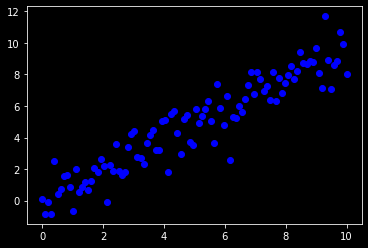

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

plt.scatter(X,y,c='b')

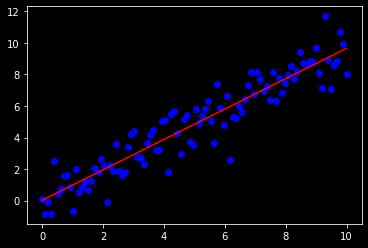

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predictions = model.predict(X)

plt.scatter(X,y,c='b')
plt.plot(X,predictions,c='r')

In [5]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic =titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
y = titanic['survived']
X = titanic.drop('survived',axis=1)

model.fit(X,y)
model.score(X,y)

0.8417366946778712

In [11]:
def survie(model,pclass=1, sex=0, age=27):
    X=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(X))
    print(model.predict_proba(X))

In [12]:
survie(model)

[1]
[[0.4 0.6]]


/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Recherche des optima
* créer un train_set et un test_set
* gridsearch : n_neighbors, metrics et weights
* learning curve

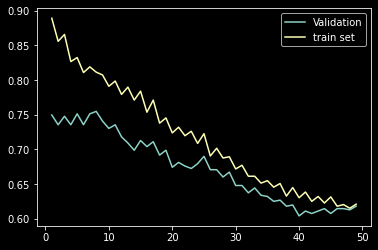

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.model_selection import validation_curve

k = np.arange(1,50)
model = KNeighborsClassifier()

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors',param_range=k , cv=4)

plt.plot(k,val_score.mean(axis=1),label='Validation')
plt.plot(k,train_score.mean(axis=1),label='train set')
plt.legend()

In [19]:
from sklearn.model_selection import GridSearchCV
param = { 'n_neighbors':np.arange(1,20), 'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param,cv=5)
grid.fit(X_train,y_train)

model_best = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

model_best.score(X_test,y_test)

{'metric': 'manhattan', 'n_neighbors': 3} 0.7688482074752097


0.7832167832167832

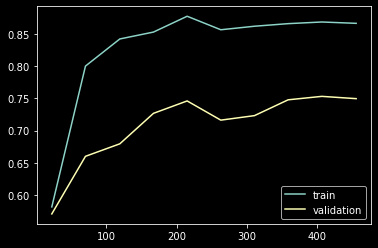

In [22]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_best,X_train,y_train,train_sizes=np.linspace(0.05,1.0,10),cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()

[[71 13]
 [18 41]]


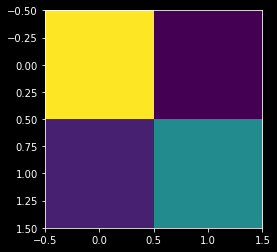

In [25]:
from sklearn.metrics import confusion_matrix

pred = confusion_matrix(y_test, model_best.predict(X_test))

print(pred)

plt.imshow(pred)